In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [10]:
df = pd.read_csv(r"C:\Users\Parth Bhunia\Downloads\PharmaIQ\dataset\salesmonthly.csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.1+ KB


In [16]:
print(df.columns)

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06'],
      dtype='object')


In [18]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [37]:
df.tail()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
65,2019-06-30,151.54,101.627,103.20,610.00,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.80,649.80,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.20,518.10,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.50,984.48,227.8,16.0,161.0,109.10
69,2019-10-31,44.37,37.300,20.65,295.15,86.0,7.0,37.0,11.13


In [19]:
df['datum'] = pd.to_datetime(df['datum'])

In [20]:
df_long = df.melt(id_vars=['datum'],
                  value_vars=['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06'],
                  var_name='ATC_code',
                  value_name='Sales')

In [24]:
print(df_long.head(10))

       datum ATC_code   Sales
0 2014-01-31    M01AB  127.69
1 2014-02-28    M01AB  133.32
2 2014-03-31    M01AB  137.44
3 2014-04-30    M01AB  113.10
4 2014-05-31    M01AB  101.79
5 2014-06-30    M01AB  112.07
6 2014-07-31    M01AB  117.06
7 2014-08-31    M01AB  134.79
8 2014-09-30    M01AB  108.78
9 2014-10-31    M01AB  154.75


In [29]:
df_long['Year'] = df_long['datum'].dt.year
df_long['Month'] = df_long['datum'].dt.month

In [30]:
print(df_long.head(10))

        datum ATC_code   Sales  Year  Month  Sales_Lag1  Sales_Lag3
3  2014-04-30    M01AB  113.10  2014      4      137.44      127.69
4  2014-05-31    M01AB  101.79  2014      5      113.10      133.32
5  2014-06-30    M01AB  112.07  2014      6      101.79      137.44
6  2014-07-31    M01AB  117.06  2014      7      112.07      113.10
7  2014-08-31    M01AB  134.79  2014      8      117.06      101.79
8  2014-09-30    M01AB  108.78  2014      9      134.79      112.07
9  2014-10-31    M01AB  154.75  2014     10      108.78      117.06
10 2014-11-30    M01AB  138.08  2014     11      154.75      134.79
11 2014-12-31    M01AB  131.90  2014     12      138.08      108.78
12 2015-01-31    M01AB  135.91  2015      1      131.90      154.75


In [31]:
df_long['Sales_Lag1'] = df_long.groupby('ATC_code')['Sales'].shift(1)
df_long['Sales_Lag3'] = df_long.groupby('ATC_code')['Sales'].shift(3)

In [32]:
print(df_long.head(10))

        datum ATC_code   Sales  Year  Month  Sales_Lag1  Sales_Lag3
3  2014-04-30    M01AB  113.10  2014      4         NaN         NaN
4  2014-05-31    M01AB  101.79  2014      5      113.10         NaN
5  2014-06-30    M01AB  112.07  2014      6      101.79         NaN
6  2014-07-31    M01AB  117.06  2014      7      112.07      113.10
7  2014-08-31    M01AB  134.79  2014      8      117.06      101.79
8  2014-09-30    M01AB  108.78  2014      9      134.79      112.07
9  2014-10-31    M01AB  154.75  2014     10      108.78      117.06
10 2014-11-30    M01AB  138.08  2014     11      154.75      134.79
11 2014-12-31    M01AB  131.90  2014     12      138.08      108.78
12 2015-01-31    M01AB  135.91  2015      1      131.90      154.75


In [33]:
df_long = df_long.dropna()

In [34]:
print(df_long.head(10))

        datum ATC_code   Sales  Year  Month  Sales_Lag1  Sales_Lag3
6  2014-07-31    M01AB  117.06  2014      7      112.07      113.10
7  2014-08-31    M01AB  134.79  2014      8      117.06      101.79
8  2014-09-30    M01AB  108.78  2014      9      134.79      112.07
9  2014-10-31    M01AB  154.75  2014     10      108.78      117.06
10 2014-11-30    M01AB  138.08  2014     11      154.75      134.79
11 2014-12-31    M01AB  131.90  2014     12      138.08      108.78
12 2015-01-31    M01AB  135.91  2015      1      131.90      154.75
13 2015-02-28    M01AB  115.71  2015      2      135.91      138.08
14 2015-03-31    M01AB  156.04  2015      3      115.71      131.90
15 2015-04-30    M01AB  154.50  2015      4      156.04      135.91


In [35]:
train = df_long[df_long['datum'] < '2019-01-01']
test  = df_long[df_long['datum'] >= '2019-01-01']

In [36]:
X_train = train[['Year','Month','Sales_Lag1','Sales_Lag3']]
y_train = train['Sales']
X_test  = test[['Year','Month','Sales_Lag1','Sales_Lag3']]
y_test  = test['Sales']

In [38]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [39]:
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

In [53]:
def evaluate_model(y_true, preds, name):
    mae = mean_absolute_error(y_true, preds)
    mse = mean_squared_error(y_true, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, preds)
    mape = np.mean(np.abs((y_true - preds) / y_true)) * 100
    
    print(f"{name} Performance:")
    print(f"MAE  : {mae:.2f}")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.2f}")
    print(f"MAPE : {mape:.2f}%")
    print("-" * 40)

In [54]:
evaluate_model(y_test, rf_preds, "Random Forest")

Random Forest Performance:
MAE  : 66.69
MSE  : 20484.45
RMSE : 143.12
R²   : 0.71
MAPE : 55.99%
----------------------------------------


In [55]:
evaluate_model(y_test, xgb_preds, "XGBoost")

XGBoost Performance:
MAE  : 73.89
MSE  : 27999.94
RMSE : 167.33
R²   : 0.61
MAPE : 63.84%
----------------------------------------


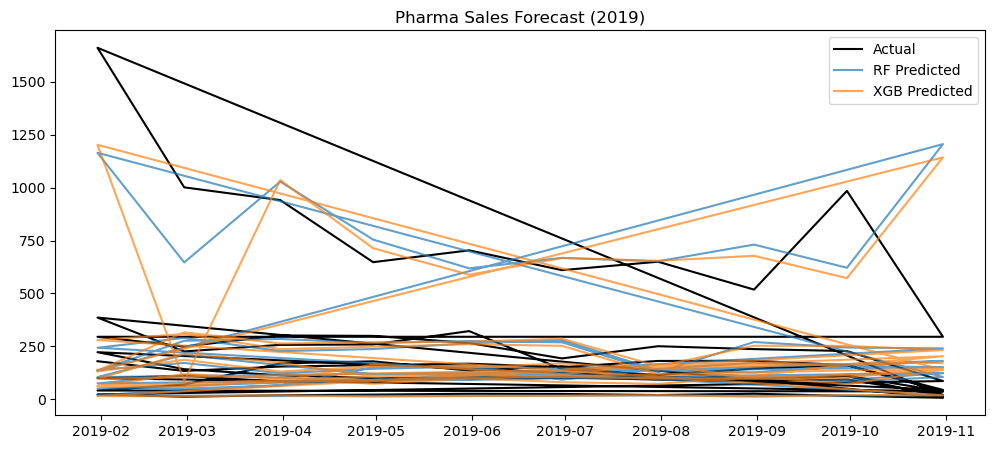

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test['datum'], y_test.values, label="Actual", color='black')
plt.plot(test['datum'], rf_preds, label="RF Predicted", alpha=0.7)
plt.plot(test['datum'], xgb_preds, label="XGB Predicted", alpha=0.7)
plt.legend()
plt.title("Pharma Sales Forecast (2019)")
plt.show()

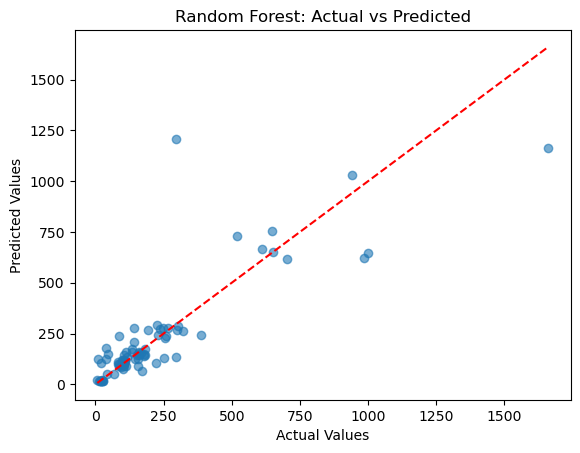

In [63]:
plt.scatter(y_test, rf_preds, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()


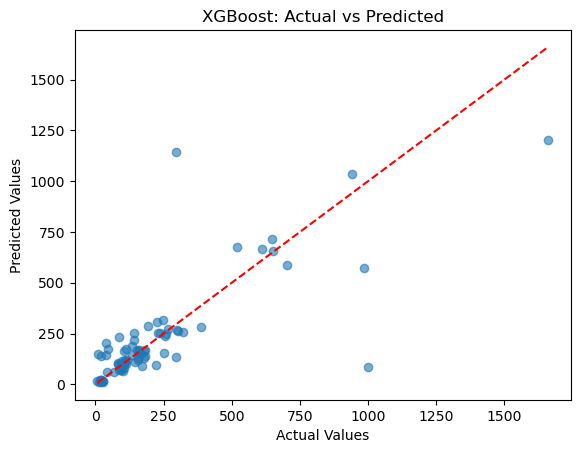

In [62]:
plt.scatter(y_test, xgb_preds, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--")
plt.show()
